<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_6/6_lab_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 63.50%


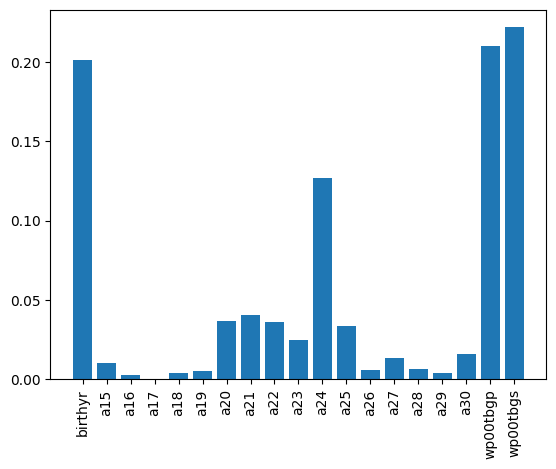

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("biofam.csv", delimiter = ';')

# Удаление столбца id
df.drop(columns=['idhous'], inplace=True)
df.drop(columns=['nat_1_02'], inplace=True)
df.drop(columns=['plingu02'], inplace=True)
df.drop(columns=['p02r01'], inplace=True)
df.drop(columns=['p02r04'], inplace=True)
df.drop(columns=['cspfaj'], inplace=True)
df.drop(columns=['cspmoj'], inplace=True)

# Замена значений столбца sex
df['sex'].replace({0: 'woman', 1: 'man'}, inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop(columns=['sex'])
y = df['sex']

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели бустинга
model = GradientBoostingClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# График важности признаков
importance = model.feature_importances_
plt.bar([x for x in X.columns], importance)
plt.xticks(rotation='vertical')
plt.show()
